# Life Expectancy by Country - Linear Regression Analysis

### Polli Fakhretdinova
CIS 8005 - Individual Extra Project 

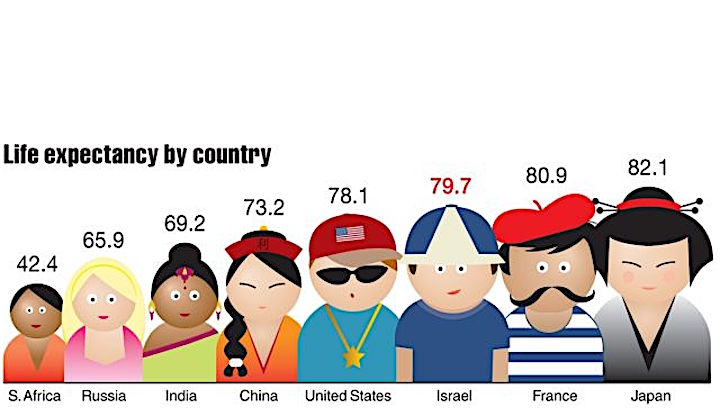

In [1]:
from IPython.display import Image
Image(filename='Life Expectancy Image.jpg')

======================================================================================================================

### Step 1: Introduction & Objective

Regression analysis is a statistical tool for the investigation of relationships between variables. Usually, the investigator seeks to examine the causal effect of one variable upon another. It attempts to determine the strength of the relationship between one dependent variable and a series of other changing variables known as independent variables. The two basic types of regression are linear regression and multiple regression. Linear regression uses one independent variable to explain and/or predict the dependent variable, while multiple regression uses two or more independent variables to predict the outcome. 
The general form of each type of regression is: 

-Linear Regression: Y = a + bX + u

-Multiple Regression: Y = a + b1X1 + b2X2 + b3X3 + ... + btXt + u

Where:

-Y = the variable that we are trying to predict

-X = the variable that we are using to predict Y

-a = the intercept

-b = the slope

-u = the regression residual

The main objective of the Regression project is to build a mathematical model that will help to make accurate predictions about impact of independent variables on the dependent variable. 

In [1]:
# These are the libraries used in the analysis 
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
import matplotlib.pyplot as plt
plt.rcdefaults()
import statsmodels.api as sm

======================================================================================================================

### Step 2: Variables and Data

For the purpose of this research, following variables were collected from 152 countries:
    
- Dependent Variable - Life Expectancy
    
- Independent Variables: Population, Literacy, Labor Force, Median Age, Urbanization, GDP Per Capita, Population Growth Rate, Population Below Poverty Line, Continent, Religion


In [3]:
df = pd.read_excel('Life Expectancy Data.xlsx')
df.head()

,Country_Name,Life_Expectancy,Population,Median_Age,GDP_Per_Cap,Labor_Force,Below_Poverty_Line,Literacy,Population_Grow_Rate,Urbanization,Continent,Religion
0,Afghanistan,45.02,29835392,18.2,900,15000000,0.360,0.281,0.02375,0.23,Asia,Islam
1,Albania,77.41,2994667,30.4,8000,1053000,0.125,0.987,0.00267,0.52,Europe,Islam
2,Algeria,74.50,34994937,27.6,7300,10810000,0.230,0.699,0.01173,0.66,Africa,Islam
3,Angola,38.76,13338541,18.1,8200,8014000,0.405,0.674,0.02034,0.59,Africa,Others
4,Argentina,76.95,41769726,30.5,14700,16540000,0.300,0.972,0.01017,0.92,South America,Christianity


======================================================================================================================

### Step 3: Data Facts

The data includes 51 African countries, 48 Asian countries, 36 European countries, 11 South American countries, 3 Australian countries, and 3 North American countries.

In [4]:
# Number of countries grouped by continent 
g0 = df.groupby(['Continent'],sort=True).count()['Country_Name']
g0

Continent
Africa           51
Asia             48
Australia         3
Europe           36
North America     3
South America    11
Name: Country_Name, dtype: int64

The data includes 77 Christian countries, 49 Muslim countries, and 26 countries from other religious groups. 

In [5]:
# Number of countries grouped by religion
g = df.groupby(['Religion'],sort=True).count()['Country_Name']
g

Religion
Christianity    77
Islam           49
Others          26
Name: Country_Name, dtype: int64

According to the data, average life expectancy in Africa is 58, 72 in Asia, 76 in Ausralia, 77 in Europe, 79 in North America, and  74 in South America. African continent has the smallest average life expectancy. Whereas, North American continent has the highest average life expectancy. 

In [6]:
# Average Life Expectancy by Continent
g1 = df.groupby(['Continent'],sort=True).mean()['Life_Expectancy'].round()
g1

Continent
Africa           58.0
Asia             72.0
Australia        76.0
Europe           77.0
North America    79.0
South America    74.0
Name: Life_Expectancy, dtype: float64

People in Christian countries on avrage live 71 years. On the other hand, people in Muslim countries and in countries with other belief systems, on average, live 67 years. 

In [7]:
# Average Life Expectancy by Religion
g_ = df.groupby(['Religion'],sort=True).mean()['Life_Expectancy'].round()
g_

Religion
Christianity    71.0
Islam           67.0
Others          67.0
Name: Life_Expectancy, dtype: float64

Ten top countries with the highest life expectancy are: Macau, Japan, Singapore, Hong Kong, Australia, Italy, Canada, France, Spain, and Switzerland. 60% of the top countries are from the Western world and the rest are Asian countries.

In [8]:
# Top 10 countries with the highest life expectany
a = df[['Country_Name', 'Life_Expectancy']]
a_1 = a.sort_values('Life_Expectancy', ascending=False)
a_2 = a_1.head(10)
a_2

,Country_Name,Life_Expectancy
80,Macau,84.41
66,Japan,82.25
118,Singapore,82.14
57,Hong Kong,82.04
6,Australia,81.81
65,Italy,81.77
25,Canada,81.38
46,France,81.19
124,Spain,81.17
129,Switzerland,81.07


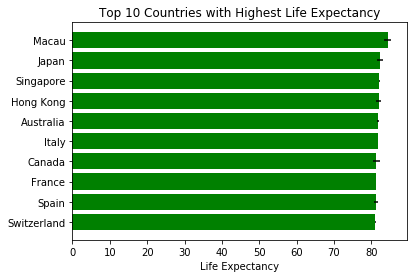

In [37]:
fig, ax = plt.subplots()

Country = a_2['Country_Name']
y_pos = np.arange(len(Country))
Life_Expectancy = a_2['Life_Expectancy']
error = np.random.rand(len(Country))

ax.barh(y_pos, Life_Expectancy, xerr=error, align='center',
        color='green', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  

ax.set_xlabel('Life Expectancy')
ax.set_title('Top 10 Countries with Highest Life Expectancy')

plt.show()

Ten countries with the lowest life expectancy are: Somalia, Central African Republic, Zimbabwe, Guinea-Bissau, Swaziland, Chad, Nigeria, Afghanistan, and Angola.

In [15]:
# 10 countries with the lowest life expectancy
b = df[['Country_Name', 'Life_Expectancy']]
b_1 = b.sort_values('Life_Expectancy', ascending=False)
b_2 = b_1.tail(10)
b_2

,Country_Name,Life_Expectancy
121,Somalia,50.40
27,Central African Republic,50.07
151,Zimbabwe,49.64
122,South Africa,49.33
55,Guinea-Bissau,48.70
127,Swaziland,48.66
28,Chad,48.33
98,Nigeria,47.56
0,Afghanistan,45.02
3,Angola,38.76


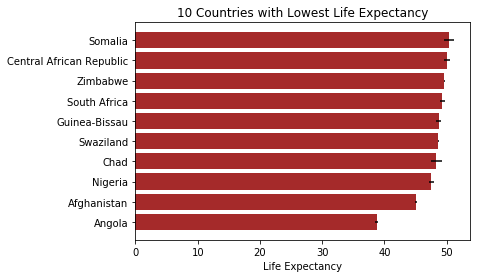

In [36]:
fig, ax = plt.subplots()

Country = b_2['Country_Name']
y_pos = np.arange(len(Country))
Life_Expectancy = b_2['Life_Expectancy']
error = np.random.rand(len(Country))

ax.barh(y_pos, Life_Expectancy, xerr=error, align='center',
        color='brown', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  

ax.set_xlabel('Life Expectancy')
ax.set_title('10 Countries with Lowest Life Expectancy')

plt.show()

Ten top countries with the largest population are: China, India, United States of America, Indonesia, Brazil, Pakistan, Bangladesh, Nigeria, Russia, and Japan.

In [18]:
# Top 10 countries with the largest population
j = df[['Country_Name', 'Population']]
j_1 = j.sort_values('Population', ascending=False)
j_2 = j_1.head(10)
j_2

,Country_Name,Population
30,China,1336718015
59,India,1189172906
144,United States of America,313232044
60,Indonesia,245613043
18,Brazil,203429773
102,Pakistan,187342721
10,Bangladesh,158570535
98,Nigeria,155215573
112,Russia,138739892
66,Japan,126475664


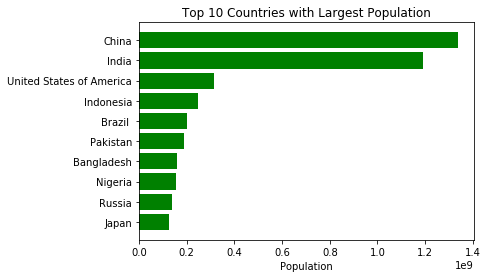

In [35]:
fig, ax = plt.subplots()

Country = j_2['Country_Name']
y_pos = np.arange(len(Country))
Population = j_2['Population']
error = np.random.rand(len(Country))

ax.barh(y_pos, Population, xerr=error, align='center',
        color='green', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  

ax.set_xlabel('Population')
ax.set_title('Top 10 Countries with Largest Population')

plt.show()

Ten countries with the smallest population are: Timor-Leste, Qatar, Comoros, Djibouti, Guyana, Bhutan, Equatorial Guinea, Macau, Cape Verde, Luxembourg.

In [25]:
# 10 countries with the smallest population
o = df[['Country_Name', 'Population']]
o_1 = o.sort_values('Population', ascending=False)
o_2 = o_1.tail(10)
o_2

,Country_Name,Population
135,Timor-Leste,1177834
109,Qatar,848016
32,Comoros,794683
38,Djibouti,757074
56,Guyana,744768
14,Bhutan,708427
41,Equatorial Guinea,668225
80,Macau,573003
26,Cape Verde,516100
79,Luxembourg,503302


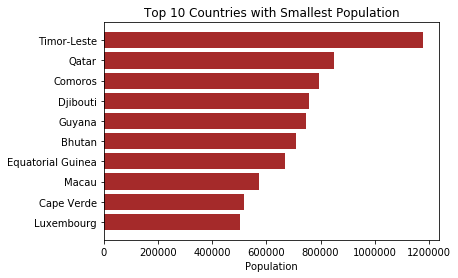

In [38]:
fig, ax = plt.subplots()

Country = o_2['Country_Name']
y_pos = np.arange(len(Country))
Population = o_2['Population']
error = np.random.rand(len(Country))

ax.barh(y_pos, Population, xerr=error, align='center',
        color='brown', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  

ax.set_xlabel('Population')
ax.set_title('Top 10 Countries with Smallest Population')

plt.show()

Ten top countries with the highest GDP Per Capita are: Qatar, Luxembourg, Singapore, Norway, United Arab Emirates, Kuwait, United States of America, Hong Kong, Switzerland, and Australia.

In [27]:
# Top 10 countries with the largest GDP Per Capita
f = df[['Country_Name', 'GDP_Per_Cap']]
f_1 = f.sort_values('GDP_Per_Cap', ascending=False)
f_2 = f_1.head(10)
f_2

,Country_Name,GDP_Per_Cap
109,Qatar,179000
79,Luxembourg,82600
118,Singapore,62100
100,Norway,54600
142,United Arab Emirates,49600
70,Kuwait,48900
144,United States of America,47200
57,Hong Kong,45900
129,Switzerland,42600
6,Australia,41000


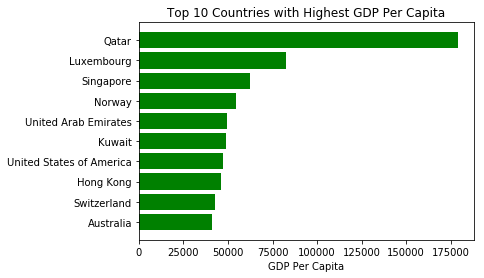

In [33]:
fig, ax = plt.subplots()

Country = f_2['Country_Name']
y_pos = np.arange(len(Country))
GDP_Per_Cap = f_2['GDP_Per_Cap']
error = np.random.rand(len(Country))

ax.barh(y_pos, GDP_Per_Cap, xerr=error, align='center',
        color='green', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  

ax.set_xlabel('GDP Per Capita')
ax.set_title('Top 10 Countries with Highest GDP Per Capita')

plt.show()

Ten countries with the lowest GDP Per Capita are: Madagascar, Malawi, Niger, Central African Republic, Somalia, Eritrea, Liberia, Zimbabwe, Democratic Republic of the Congo, and Burund.

In [39]:
# 10 countries with the lowest GDP Per Capita
v = df[['Country_Name', 'GDP_Per_Cap']]
v_1 = v.sort_values('GDP_Per_Cap', ascending=False)
v_2 = v_1.tail(10)
v_2

,Country_Name,GDP_Per_Cap
82,Madagascar,900
83,Malawi,800
97,Niger,700
27,Central African Republic,700
121,Somalia,600
42,Eritrea,600
76,Liberia,500
151,Zimbabwe,500
36,Democratic Republic of the Congo,300
22,Burundi,300


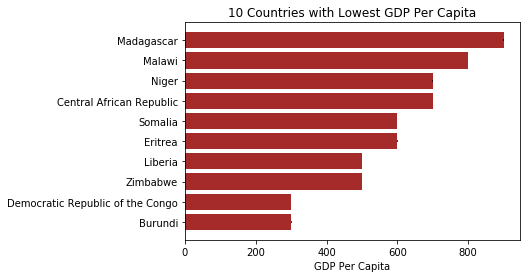

In [40]:
fig, ax = plt.subplots()

Country = v_2['Country_Name']
y_pos = np.arange(len(Country))
GDP_Per_Cap = v_2['GDP_Per_Cap']
error = np.random.rand(len(Country))

ax.barh(y_pos, GDP_Per_Cap, xerr=error, align='center',
        color='brown', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  

ax.set_xlabel('GDP Per Capita')
ax.set_title('10 Countries with Lowest GDP Per Capita')

plt.show()

======================================================================================================================

In [ ]:
df_l = df[['Country_Name','Literacy','Urbanization','Below_Poverty_Line','Population_Grow_Rate']]
df_l['Literacy_%'] = (df_l['Literacy']) * 100
df_l['Urbanization_%'] = (df_l['Urbanization']) * 100
df_l['Below_Poverty_Line_%'] = (df_l['Below_Poverty_Line']) * 100
df_l['Population_Grow_Rate_%'] = (df_l['Population_Grow_Rate']) * 100

df_ll = df_l.sort_values('Urbanization_%', ascending=False)
df_lll = df_ll[['Country_Name','Literacy_%','Urbanization_%','Below_Poverty_Line_%', 'Population_Grow_Rate_%']]

Top 10 countries with the highest literacy rate are: Norway, Luxembourg, Finland, Georgia, Estonia, Poland, Latvia, Slovenia, Slovakia, and Belarus.

In [60]:
z_1 = df_lll[['Country_Name','Literacy_%']]
z_11 = z_1.sort_values('Literacy_%', ascending=False)
z_11.head(10)

,Country_Name,Literacy_%
100,Norway,100.0
79,Luxembourg,100.0
45,Finland,100.0
50,Georgia,100.0
43,Estonia,99.8
107,Poland,99.8
73,Latvia,99.7
120,Slovenia,99.7
119,Slovakia,99.6
11,Belarus,99.6


Top 10 countries with the highest urbanization are: Singapore, Hong Kong, Macau, Kuwait, Belgium, Qatar, Venezuela, Argentina, Uruguay, and Israel.

In [61]:
z_2 = df_lll[['Country_Name','Urbanization_%']]
z_22 = z_2.sort_values('Urbanization_%', ascending=False)
z_22.head(10)

,Country_Name,Urbanization_%
118,Singapore,100.0
57,Hong Kong,100.0
80,Macau,100.0
70,Kuwait,98.0
12,Belgium,97.0
109,Qatar,96.0
147,Venezuela,93.0
4,Argentina,92.0
145,Uruguay,92.0
64,Israel,92.0


Ten countries with the highest population below poverty line are: Somalia, Chad, Liberia, Democratic Republic of the Congo, Sierra Leone, Nigeria, Gaza Strip, Mozambique, Swaziland, and Burundi. 

In [68]:
z_3 = df_lll[['Country_Name','Below_Poverty_Line_%']]
z_33 = z_3.sort_values('Below_Poverty_Line_%', ascending=False)
z_33.head(10)

,Country_Name,Below_Poverty_Line_%
121,Somalia,87.56
28,Chad,80.00
76,Liberia,80.00
36,Democratic Republic of the Congo,71.00
117,Sierra Leone,70.20
98,Nigeria,70.00
49,Gaza Strip,70.00
92,Mozambique,70.00
127,Swaziland,69.00
22,Burundi,68.00


Ten countries with the lowest population growth rate are: Georgia, Belarus, South Africa, Guyana, Serbia, Russia, Latvia, Ukraine, Estonia, and Bulgaria. 

In [67]:
z_4 = df_lll[['Country_Name','Population_Grow_Rate_%']]
z_44 = z_4.sort_values('Population_Grow_Rate_%', ascending=False)
z_44.tail(10)

,Country_Name,Population_Grow_Rate_%
50,Georgia,-0.326
11,Belarus,-0.363
122,South Africa,-0.380
56,Guyana,-0.440
116,Serbia,-0.467
112,Russia,-0.470
73,Latvia,-0.597
141,Ukraine,-0.622
43,Estonia,-0.641
19,Bulgaria,-0.781


======================================================================================================================

### Step 4 : Charts and Graphs

#### Histogram for Life Expectancy 

According to the histogram for Life Expectancy, most of the countries’ life expectancy is between 74 and 79. Countries in Europe, Asia, North and South America have higher life expectancy than countries in Africa and Central Asia. 

In [ ]:
%matplotlib inline

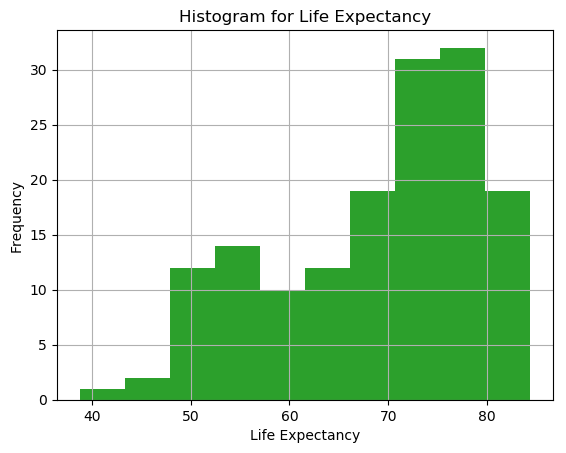

In [177]:
y = df['Life_Expectancy']
y.hist()
plt.title('Histogram for Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

#### Scatter plot for Median Age
The scatterplot for Median Age shows a positive linear relationship between median age and life expectancy. The correlation between these two variables is strong because both variables represent age. Therefore, countries with high median age have higher life expectancy and countries with low median age have low life expectancy. Although Median Age is closely correlated with life expectancy, regression analysis will show better and reliable explanation about the relationship between these two variables.


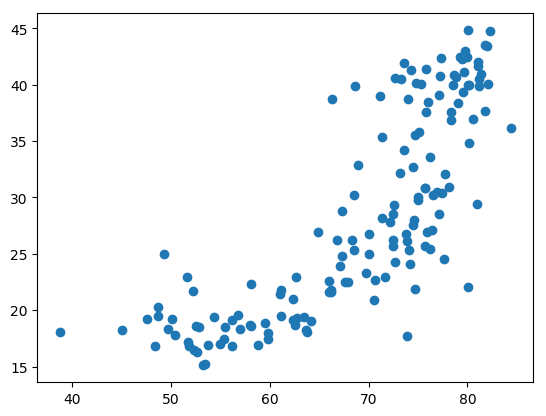

In [158]:
plt.scatter(df['Life_Expectancy'], df['Median_Age'])
plt.show() 

#### Scatter plot for Urbanization
According to the scatterplot for Urbanization, the relationship between urbanization and life expectancy is positive, yet not very strong. 

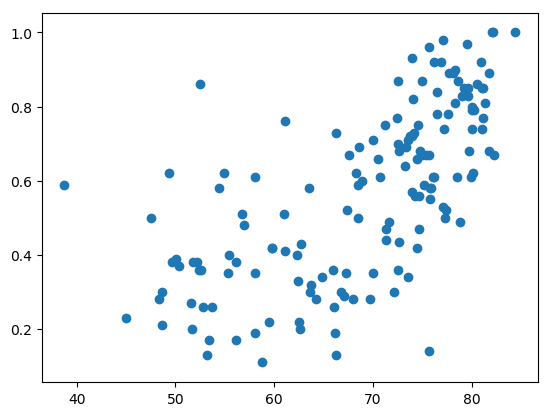

In [162]:
plt.scatter(df['Life_Expectancy'], df['Urbanization'])
plt.show() 

#### Scatter plot for Literacy
The correlation between literacy and life expectancy is positive. The relationship between these variables is weak and not reliable. One can state that people with high education have better life and live longer comparing to people with little or no education but, according to the scatterplot, literacy is not a strong predictor of life expectancy. Regression analysis will tell more about the relationship between these variables.

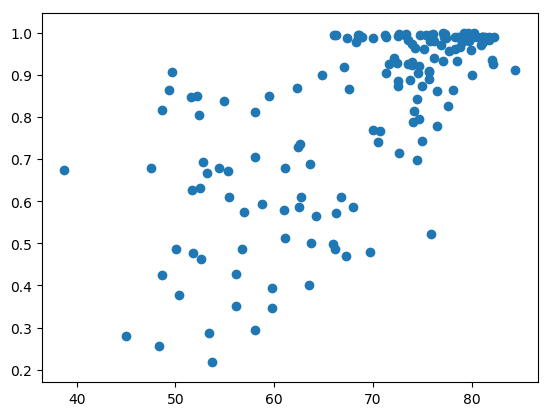

In [159]:
plt.scatter(df['Life_Expectancy'], df['Literacy'])
plt.show() 

#### Scatter plot for Population Below Poverty Line
The scatterplot for population below poverty line demonstrates inverse but somewhat strong correlation between population below poverty line and life expectancy. According to the scatterplot, people live longer in countries with low population below poverty line. 

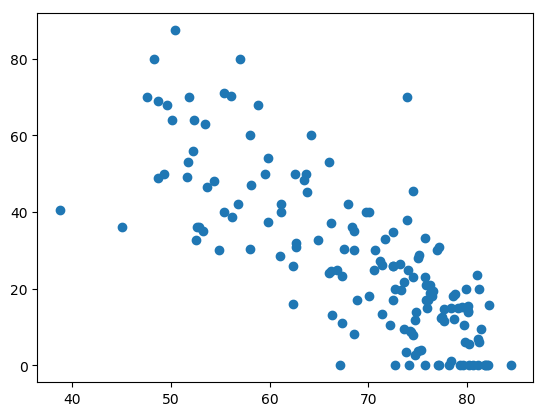

In [157]:
plt.scatter(df['Life_Expectancy'], df['Below_Poverty_Line'])
plt.show() 

#### Scatter plot for Population Growth Rate
The scatterplot for population growth rate demonstrates inverse but somewhat strong correlation between population growth rate and life expectancy. One can state that people in wealthy countries are well educated and have one or two children at their late 30s and 40s; for this reason, life expectancy in these countries is high and population growth rate is low. In comparison, in poor countries people are less educated and have many kids, therefore, population growth rate is high.

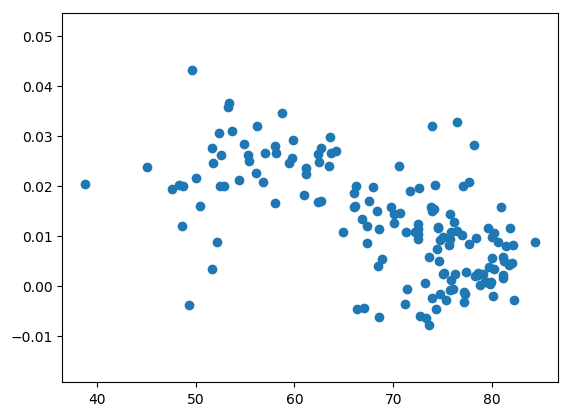

In [161]:
plt.scatter(df['Life_Expectancy'], df['Population_Grow_Rate'])
plt.show() 

#### Scatter plot for GDP Per Capita
The correlation between life expectancy and GDP per capita is positive; however, the relationship is very weak. There is one outlier on the scatterplot and that is the Qatar with the highest GDP Per Capita. According to this scatterplot, GDP Per Capita is not a good predictor of life expectancy. However, further analysis is needed.

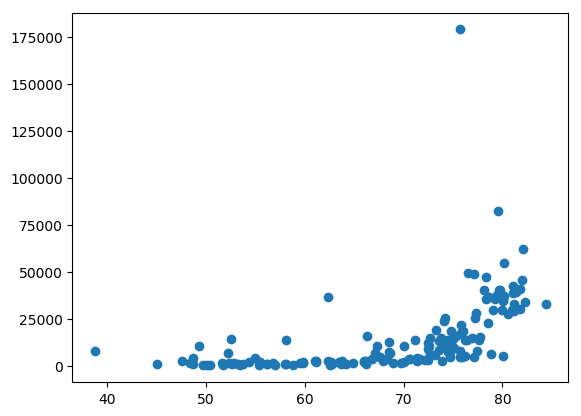

In [160]:
plt.scatter(df['Life_Expectancy'], df['GDP_Per_Cap'])
plt.show() 

#### Scatter plot for Labor Force
According to the scatterplot below, labor force and life expectancy have no relationship. There are two outliers for labor force variable and those are countries China and India with huge labor force.

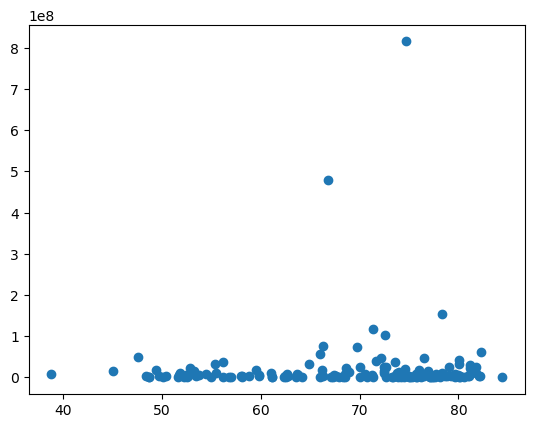

In [163]:
plt.scatter(df['Life_Expectancy'], df['Labor_Force'])
plt.show() 

#### Scatter plot for Population
According to the scatterplot below, population and life expectancy have no relationship.There are two outliers for population variable and those are countries China and India with huge population.

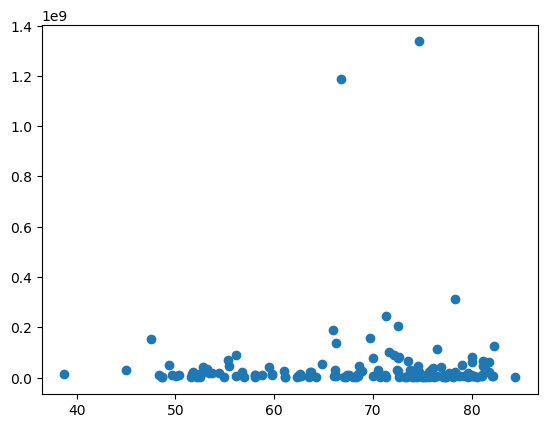

In [164]:
plt.scatter(df['Life_Expectancy'], df['Population'])
plt.show() 

### Step 5: Table of Correlation (Correlation Matrix)

The correlation matrix below confirms the results displayed in the scatterplots for each independent variable. It helps to determine the correlation between each independent variable in order to emphasize the independent variable that is the best determinant of the dependent variable. It also helps to determine whether the data contains redundant information.

In [170]:
co = df[['Life_Expectancy','Median_Age','Population', 'Labor_Force', 'GDP_Per_Cap','Urbanization','Literacy','Population_Grow_Rate','Below_Poverty_Line']]
co.corr()

,Life_Expectancy,Median_Age,Population,Labor_Force,GDP_Per_Cap,Urbanization,Literacy,Population_Grow_Rate,Below_Poverty_Line
Life_Expectancy,1.000000,0.797651,0.038985,0.054522,0.520004,0.661502,0.696186,-0.604580,-0.781259
Median_Age,0.797651,1.000000,0.046897,0.071375,0.542889,0.616638,0.745219,-0.843634,-0.719145
Population,0.038985,0.046897,1.000000,0.979097,-0.058481,-0.081464,-0.008799,-0.050899,-0.089826
Labor_Force,0.054522,0.071375,0.979097,1.000000,-0.044260,-0.066225,0.021256,-0.068586,-0.107349
GDP_Per_Cap,0.520004,0.542889,-0.058481,-0.044260,1.000000,0.610661,0.417506,-0.316610,-0.556250
Urbanization,0.661502,0.616638,-0.081464,-0.066225,0.610661,1.000000,0.577536,-0.454554,-0.589795
Literacy,0.696186,0.745219,-0.008799,0.021256,0.417506,0.577536,1.000000,-0.683339,-0.609631
Population_Grow_Rate,-0.604580,-0.843634,-0.050899,-0.068586,-0.316610,-0.454554,-0.683339,1.000000,0.599002
Below_Poverty_Line,-0.781259,-0.719145,-0.089826,-0.107349,-0.556250,-0.589795,-0.609631,0.599002,1.000000


======================================================================================================================

### Step 6: Simple Regression Analysis

#### Simple Regression with the independent variable - Median Age

The regression is significant because Significance F is a very small, which is 9.34E-35, indicating that we can be very confident that the independent variable is in fact related to the dependent variable.

The R-squared value is 0.636, indicating that 63.6% of the variability in Life Expectancy is explained by the ‘Median Age’ variable. 

The final equation that predicts Life Expectancy is ŷ = 42.63 + 0.9226 (Median Age). 

In [197]:
y = df['Life_Expectancy'] 
X = df['Median_Age'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     262.4
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           9.34e-35
Time:                        02:54:53   Log-Likelihood:                -493.66
No. Observations:                 152   AIC:                             991.3
Df Residuals:                     150   BIC:                             997.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6329      1.693     25.188      0.000      39.288      45.977
Median_Age     0.9226      0.057     16.198      0.000       0.810       1.035
==============================================================================
Omnibus:                        4.054   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.591
Skew:                          -0.303   Prob(JB):                        0.166
Kurtosis:                       3.448   Cond. No.                         99.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Simple Regression with the independent variable - Population Below Poverty Line

The regression is significant because Significance F is a very small, which is 1.65e-32, indicating that the independent variable is related to the dependent variable.

The R-squared value is 0.610, indicating that 61% of the variability in Life Expectancy is explained by the ‘Population Below Poverty Line’ variable. 

The final equation that predicts Life Expectancy is ŷ = 79.55 - 0.3897(Population Below Poverty Line). 

In [202]:
y = df['Life_Expectancy'] 
X = df['Below_Poverty_Line'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.65e-32
Time:                        02:58:32   Log-Likelihood:                -498.89
No. Observations:                 152   AIC:                             1002.
Df Residuals:                     150   BIC:                             1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 79.5487      0.878     90.650      0.000      77.815      81.283
Below_Poverty_Line    -0.3897      0.025    -15.329      0.000      -0.440      -0.339
==============================================================================
Omnibus:                       16.808   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.798
Skew:                          -0.605   Prob(JB):                     4.12e-06
Kurtosis:                       4.566   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Simple Regression with the independent variable - Literacy

The regression is significant because Significance F is a very small, which is 2.36e-23, indicating that the independent variable is related to the dependent variable.

The R-squared value is 0.485, indicating that 48.5% of the variability in Life Expectancy is explained by the ‘Literacy’ variable. The R-squared is below 50% - this variable is not a strong predictor of life expectancy.

The final equation that predicts Life Expectancy is ŷ = 41.10 + 34.32(Literacy).

In [196]:
y = df['Life_Expectancy'] 
X = df['Literacy'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.36e-23
Time:                        02:52:46   Log-Likelihood:                -520.13
No. Observations:                 152   AIC:                             1044.
Df Residuals:                     150   BIC:                             1050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1011      2.408     17.069      0.000      36.343      45.859
Literacy      34.3190      2.889     11.878      0.000      28.610      40.028
==============================================================================
Omnibus:                       26.710   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.031
Skew:                          -1.035   Prob(JB):                     2.47e-08
Kurtosis:                       4.115   Cond. No.                         7.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Simple Regression with the independent variable - Urbanization

The regression is significant because Significance F is a very small, which is 1.75e-20, indicating that the independent variable is related to the dependent variable.

The R-squared value is 0.438, indicating that 43.8% of the variability in Life Expectancy is explained by the ‘Urbanization’ variable. The R-squared is below 50% - this variable is not a strong predictor of life expectancy.

The final equation that predicts Life Expectancy is ŷ = 52.15 + 29.33(Urbanization).

In [198]:
y = df['Life_Expectancy'] 
X = df['Urbanization'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.75e-20
Time:                        02:56:08   Log-Likelihood:                -526.78
No. Observations:                 152   AIC:                             1058.
Df Residuals:                     150   BIC:                             1064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.1546      1.664     31.343      0.000      48.867      55.443
Urbanization    29.3277      2.715     10.803      0.000      23.964      34.692
==============================================================================
Omnibus:                       25.016   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.399
Skew:                          -0.921   Prob(JB):                     3.39e-08
Kurtosis:                       4.427   Cond. No.                         5.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Simple Regression with the independent variable - Population Growth Rate

The regression is significant because Significance F is a very small, which is 1.62e-16, indicating that the independent variable is related to the dependent variable.

The R-squared value is 0.366, indicating that 36.6% of the variability in Life Expectancy is explained by the ‘Population Growth Rate’ variable. The R-squared is low - this independent variable is not a good predictor of life expectancy. 

The final equation that predicts Life Expectancy is ŷ = 76.05 - 568.66(Population Growth Rate).

In [201]:
y = df['Life_Expectancy'] 
X = df['Population_Grow_Rate'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     86.41
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.62e-16
Time:                        02:57:56   Log-Likelihood:                -535.94
No. Observations:                 152   AIC:                             1076.
Df Residuals:                     150   BIC:                             1082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   76.0454      1.030     73.823      0.000      74.010      78.081
Population_Grow_Rate  -568.6576     61.173     -9.296      0.000    -689.530    -447.785
==============================================================================
Omnibus:                       18.939   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.444
Skew:                          -0.774   Prob(JB):                     8.11e-06
Kurtosis:                       4.142   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Simple Regression with the independent variable - GDP Per Capita

The regression is significant because Significance F is a very small, which is 6.62e-12, indicating that the independent variable is in fact related to the dependent variable.

The R-squared value is 0.270, indicating that 27% of the variability in Life Expectancy is explained by the ‘GDP Per Capita’ variable. The R-squared is low - this independent variable is not a good predictor of life expectancy.

The final equation that predicts Life Expectancy is ŷ = 64.88 + 0.0003(GDP Per Capita).

In [203]:
y = df['Life_Expectancy'] 
X = df['GDP_Per_Cap'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     55.59
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           6.62e-12
Time:                        02:59:23   Log-Likelihood:                -546.56
No. Observations:                 152   AIC:                             1097.
Df Residuals:                     150   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          64.8786      0.890     72.870      0.000      63.119      66.638
GDP_Per_Cap     0.0003   3.54e-05      7.456      0.000       0.000       0.000
==============================================================================
Omnibus:                       32.162   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.247
Skew:                          -1.184   Prob(JB):                     1.50e-10
Kurtosis:                       4.240   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Simple Regression with the independent variable - Labor Force

The regression is NOT significant because Significance F is a big number, which is 0.505, indicating that the independent variable is NOT related to the dependent variable.

The R-squared value is 0.003, indicating that 0.3% of the variability in Life Expectancy is explained by the ‘Labor Force’ variable. The R-square is very insignificant, therefore, the 'Labor Force' variable should not be included in the model.

In [200]:
y = df['Life_Expectancy'] 
X = df['Labor_Force'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4472
Date:                Sun, 01 Oct 2017   Prob (F-statistic):              0.505
Time:                        02:57:30   Log-Likelihood:                -570.29
No. Observations:                 152   AIC:                             1145.
Df Residuals:                     150   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          68.6318      0.872     78.733      0.000      66.909      70.354
Labor_Force  7.232e-09   1.08e-08      0.669      0.505   -1.41e-08    2.86e-08
==============================================================================
Omnibus:                       14.400   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.642
Skew:                          -0.668   Prob(JB):                      0.00109
Kurtosis:                       2.391   Cond. No.                     8.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Simple Regression with the independent variable - Population

The regression is NOT significant because Significance F is a big number, which is 0.633, indicating that the independent variable is NOT related to the dependent variable.

The R-squared value is 0.002, indicating that 0.2% of the variability in Life Expectancy is explained by the ‘Population’ variable. The R-square is very insignificant, therefore, the 'Population' variable should not be included in the model.

In [199]:
y = df['Life_Expectancy'] 
X = df['Population'] 
X = sm.add_constant(X) 

est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2283
Date:                Sun, 01 Oct 2017   Prob (F-statistic):              0.633
Time:                        02:57:13   Log-Likelihood:                -570.40
No. Observations:                 152   AIC:                             1145.
Df Residuals:                     150   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6615      0.880     78.013      0.000      66.922      70.401
Population  2.713e-09   5.68e-09      0.478      0.633    -8.5e-09    1.39e-08
==============================================================================
Omnibus:                       14.473   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.773
Skew:                          -0.672   Prob(JB):                      0.00102
Kurtosis:                       2.393   Cond. No.                     1.62e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 7: Conclusion

Based on the regression analyses above, we can conclude that best predictors of Life Expectancy are 'Median Age' and 'Population Below Poverty Line' variables.